In [5]:
using Revise

In [1]:
using QuantumStates
using UnitsToValue

In [22]:
const _μB = (μ_B / h) * (1e-6 * 1e-4)
const _gL = 1.0
const _gS = gS
;

In [28]:
H_operator = :(
    T_A * DiagonalOperator + 
    Be_A * Rotation + 
    p_A * ΛDoubling_p2q
);

In [29]:
# Spectroscopic constants for CaOH, A(100) state
# From Coxon et al. (1991)
parameters = @params begin
    T_A = 16586.167 * 299792458 * 1e-4
    Be_A = 0.337221 * 299792458 * 1e-4
    p_A = -0.04452 * 299792458 * 1e-4
end;

In [30]:
# # Spectroscopic constants for CaOH, A(100) state
# # From Coxon et al. (1996)
# parameters = @params begin
#     T_A = 16626.922 * 299792458 * 1e-4
#     Aso_A = 67.165 * 299792458 * 1e-4
#     Be_A = 0.338906 * 299792458 * 1e-4
#     p_A = -0.04405 * 299792458 * 1e-4
#     q_A = -0.4173e-3 * 299792458 * 1e-4
# end;

In [35]:
QN_bounds = (S = 1/2, I = 1/2, Λ = (-1,1), Ω = (-1/2,1/2), J = 1/2:10/2)
basis = enumerate_states(HundsCaseA_Rot, QN_bounds)
;

In [36]:
CaOH_A100_Hamiltonian = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time evaluate!(CaOH_A100_Hamiltonian)
@time solve!(CaOH_A100_Hamiltonian)
;

  0.041863 seconds (867.82 k allocations: 36.583 MiB)
  0.000071 seconds
  0.013827 seconds (496 allocations: 1017.172 KiB)


In [37]:
CaOH_A100_Hamiltonian.states[5]

State{HundsCaseA_Rot}(4.972515543421079e8, HundsCaseA_Rot[HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 1/2, 1/2, 0, 0, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = 0.0:1.0:0.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 1/2, 1/2, 1, -1, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 1/2, 1/2, 1, 0, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 1/2, 1/2, 1, 1, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 0.0:1.0:1.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 3/2, 1/2, 1, -1, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 3/2, 1/2, 1, 0, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 3/2, 1/2, 1, 1, (Σ = -0.5:1.0:0.5, Ω = 0.5:1.0:0.5, F = 1.0:1.0:2.0, M = -1.0:1.0:1.0)), HundsCaseA_Rot(0.0, 1/2, 1/2, -1/2, 1, 3/2, 1

In [38]:
@time save_to_file(CaOH_A100_Hamiltonian, "CaOH_A100_Hamiltonian", "")

  0.055168 seconds (10.52 k allocations: 236.805 KiB, 54.27% gc time)


In [377]:
function H_func!(H, scan_values)
    H.parameters.B_z = scan_values[1]
    evaluate!(H)
    QuantumStates.solve!(H)
    for i ∈ eachindex(H.states)
        H.states[i].E *= 1e6
    end
    return nothing
end
;

In [378]:
Bs = (0:0.1:20) #.+ 1e-3
scan_values = (
    B_z = Bs,
    );
iterator = Iterators.product
@time x, tracked_idxs = scan_parameters(CaOH_A000_J12to52_Hamiltonian, scan_values, iterator, H_func!, H -> energy.(H.states), n_threads=1)
;

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


  2.363165 seconds (298.17 k allocations: 127.440 MiB, 7.12% compilation time)


In [391]:
mat = hcat(values(x)...)'
;

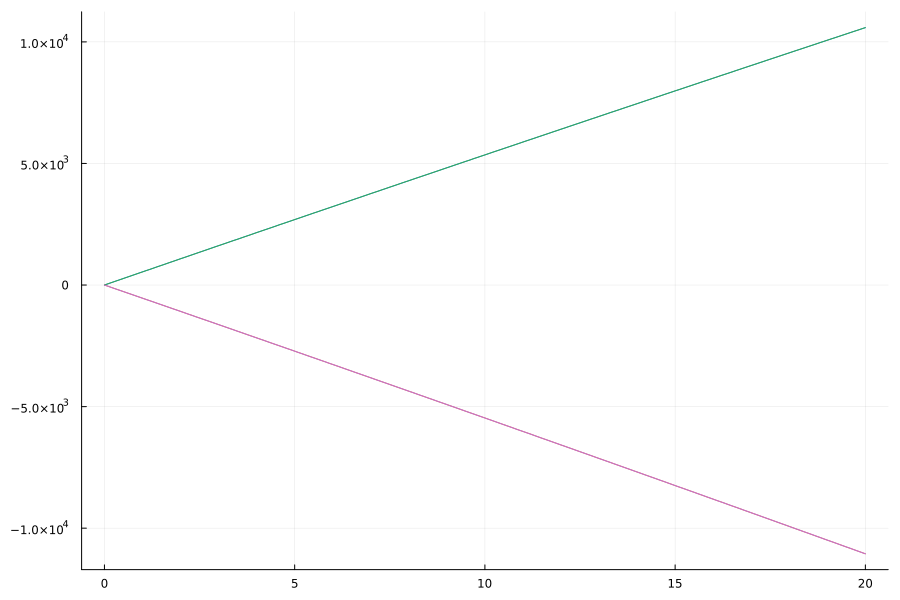

In [392]:
using Plots
plot(Bs, mat[:,1:4] .- mat[1,1], legend=nothing)
plot!(
    # xlim=(-100.,100.),
    size=(900,600)
)